<a href="https://colab.research.google.com/github/stanleyhuang12/ds542-deep-learning/blob/main/stanley_hw4a_fitting_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("fitting_models.ipynb")

# Fitting Models


Based on notebooks from Understanding Deep Learning.

<a href="https://colab.research.google.com/github/DL4DS/sp2026/blob/main/static_files/assignments/hw4a_fitting_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 -- Gradient descent

This part recreates the gradient descent algorithm as shown in figure 6.1.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [ ]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

Let's define our model, which is a straight line with intercept phi[0] and slope phi[1].

This is referred to as $f[\mathbf{x}, \boldsymbol\phi]$ in the book.

In [ ]:
# Let's define our model -- just a straight line with intercept phi[0] and slope phi[1]
# e.g. f[x, phi] in the lecture and book.
def model(phi,x):
  assert ( (phi.shape == (2,1)) | (phi.shape == (2,))) , "phi must be a column vector of shape (2,1) or (2,), found shape %s" % str(phi.shape)
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [ ]:
# Function to draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

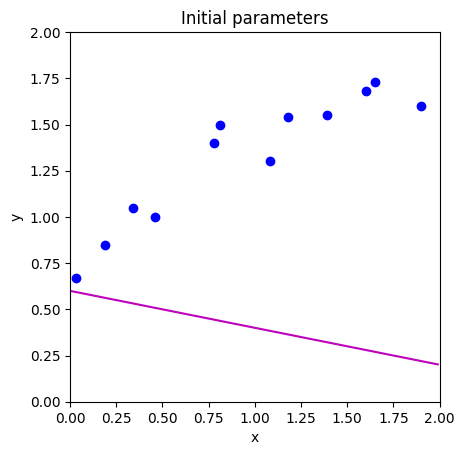

In [ ]:
# Initialize the parameters to some arbitrary values and draw the model
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")


## Question 1.1 (5 points)

Now let's compute the sum of squares loss for the training data

In [ ]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Write this function -- replace the line below
  # First make model predictions from data x
  # Then compute the squared difference between the predictions and true y values
  # Then sum them all and return
  pred_y = model(phi, data_x)
  loss = np.sum(((data_y - pred_y) ** 2))

  return loss

Let's just test that we got that right

In [ ]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


In [ ]:
grader.check("q1.1")

NameError: name 'grader' is not defined

Now let's plot the whole loss function

In [ ]:
# Define a custom color map as used in the book's plots
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap_vals = np.vstack((r,g,b)).transpose()/255.0
my_colormap = ListedColormap(my_colormap_vals)

In [ ]:
# Function to draw loss function
def draw_loss_function(compute_loss, data,  model, my_colormap, phi_iters = None):

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel(r'Intercept $\phi_{0}$'); ax.set_ylabel(r'Slope, $\phi_{1}$')
  plt.show()

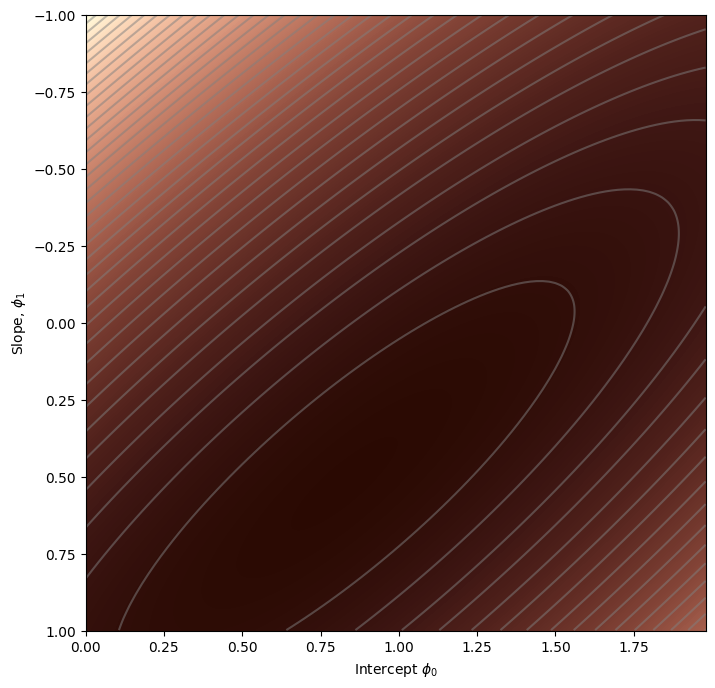

In [ ]:
draw_loss_function(compute_loss, data, model, my_colormap)

## Question 1.2 (5 points)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [ ]:
# These are in the lecture slides and notes, but worth trying to calculate them yourself to
# check that you get them right.  Write out the expression for the sum of squares loss and take the
# derivative with respect to phi0 and phi1
def compute_gradient(data_x, data_y, phi):
    # TODO -- write this function, replacing the lines below
    dl_dphi0 = np.sum(-2 * (data_y -(phi[0] + phi[1]*data_x)))
    dl_dphi1 = np.sum(2 * (data_y -(phi[0] + phi[1]*data_x)) * -data_x)

    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function one million plus one times, and usually computing the gradients directly is much more efficient.

In [ ]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0, 0],gradient[1, 0]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation


Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


In [ ]:
grader.check("q1.2")

NameError: name 'grader' is not defined

## Question 1.3 (5 points)

Now we are ready to perform gradient descent.  

In [ ]:
def gradient_descent_step(phi, data,  model, alpha=0.01):
  # TODO -- update Phi with the gradient descent step (equation 6.3)

  # 1. Compute the gradient (you wrote this function above)
  gradient = compute_gradient(data_x=data[0, :], data_y=data[1, :], phi=phi)

  # 2. Update the parameters phi based on the gradient and the step size alpha.
  phi = phi - (alpha * gradient)

  return phi

In [ ]:
# Experiment with n_steps and alpha
n_steps = 200
alpha = 0.0065


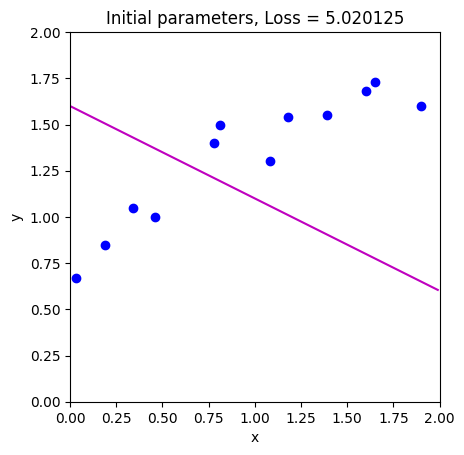

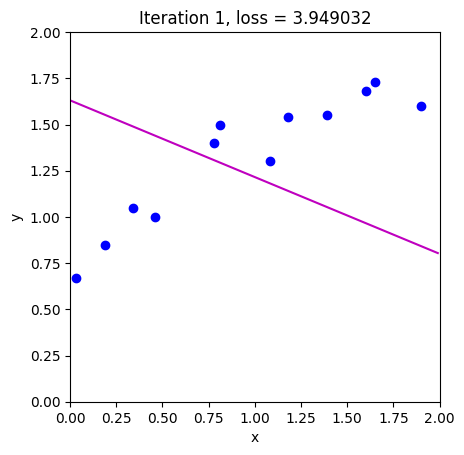

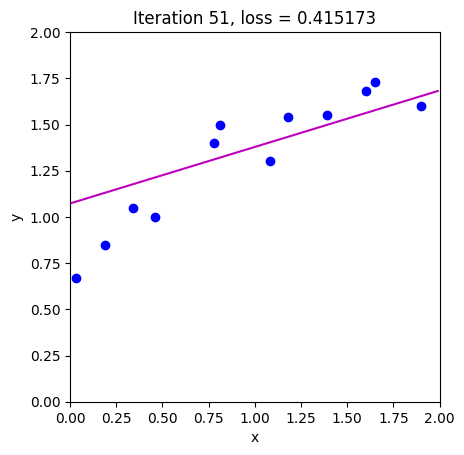

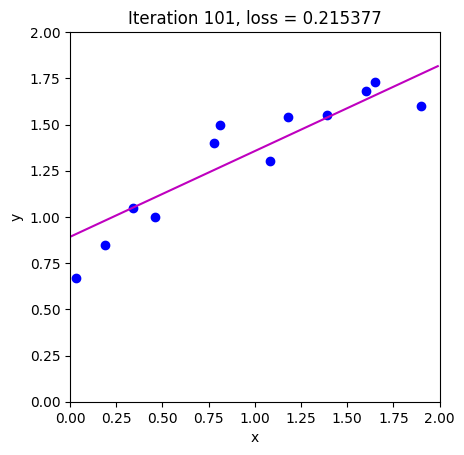

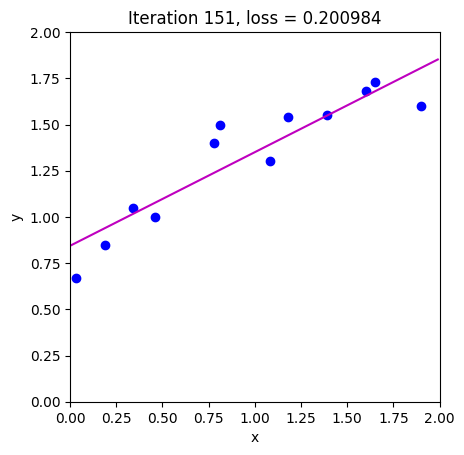

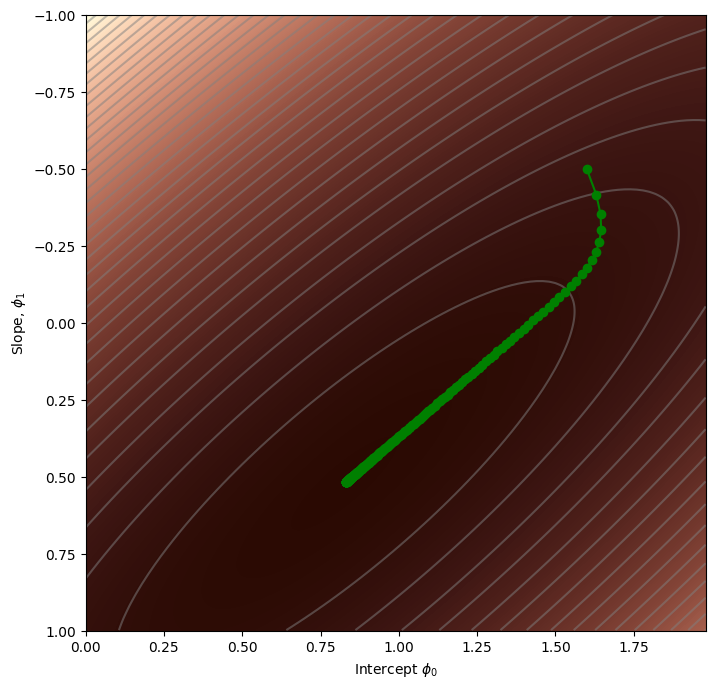

In [ ]:
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Repeatedly take gradient descent steps
for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model, alpha)
  # Measure loss and draw model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])

  if c_step % (n_steps // 4) == 0:
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model, my_colormap, phi_all)


Now checking if loss is below 0.32.

In [ ]:
grader.check("q1.3")

---

## Part 2 -- Stochastic Gradient Descent

---


This part investigates gradient descent and stochastic gradient descent and recreates figure 6.5 from the book

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Let's create our training data of 30 pairs {x_i, y_i}. This originated as points on a Gabor function with some noise added.

We'll try to fit the Gabor model to this data.

In [ ]:

data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])
print(f"data.shape: {data.shape}")

data.shape: (2, 30)


We'll define a Gabor model which is a product of a sine wave and a Gaussian. It's a useful model because it only has two parameters so it makes it easier to plot the loss function in terms of those two parameters.

In [ ]:
# Let's define our model
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

Define a function to draw the model and the data points.

In [ ]:
# Draw model
def draw_model(data,model,phi,title=None):
  """
  Draw a model, parameterized by phi, between -15 and 15 with a step of 0.1 as well as the training data.
  """
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

Let's initialize the parameters and draw the model.

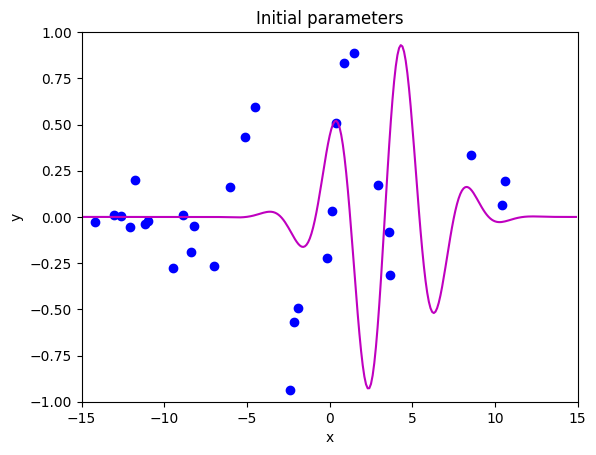

In [ ]:
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency
draw_model(data,model,phi, "Initial parameters")


We can reuse the loss computation function from the previous section.

Let's just test that we got that right

In [ ]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 16.419))

Your loss = 16.419, Correct loss = 16.419


Let's update the draw_loss_funcion to plot the loss function over parameter ranges

$$-10 \leq \phi_0 \leq 10 \hspace{1cm}\textrm{and}\hspace{1cm} 2.5 \leq \phi_1 \leq 22.5$$

In [ ]:
# Function to draw loss function
def draw_loss_function(compute_loss, data,  model, my_colormap, phi_iters = None):

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel(r'Offset $\phi_{0}$'); ax.set_ylabel(r'Frequency, $\phi_{1}$')
  plt.show()

And now let's plot the loss over those parameter ranges.

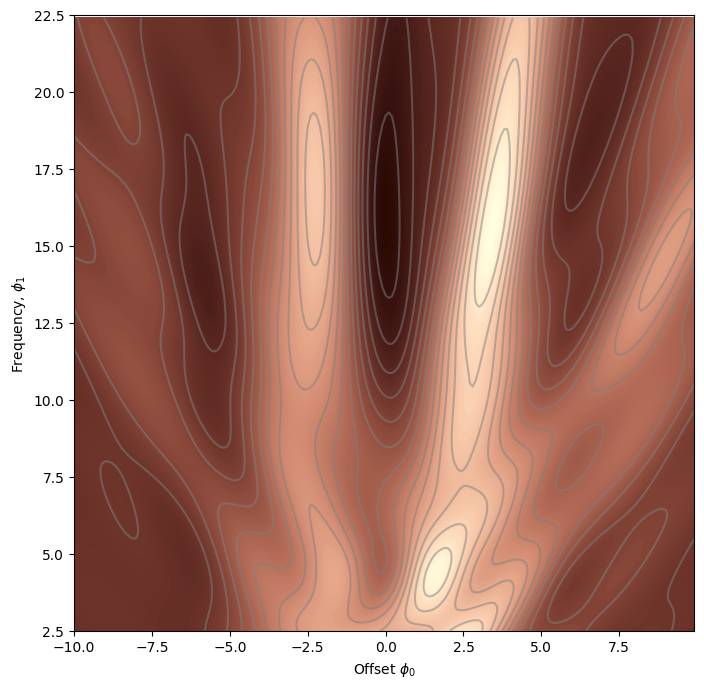

In [ ]:
draw_loss_function(compute_loss, data, model, my_colormap)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

This is a bit tricky for the Gabor model, so we'll provide it for you.

In [ ]:
# These came from writing out the expression for the sum of squares loss and
# taking the derivative with respect to phi0 and phi1. It was a lot of hassle to
# get it right!
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    """
    Compute the derivative of the loss function with respect to phi0.
    """
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    """
    Compute the derivative of the loss function with respect to phi1.
    """
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    """
    Compute the gradient of the loss function with respect to the parameters.
    """
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function two million times, and usually computing the gradients directly is much more efficient.

In [ ]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Analytical gradients: (%3.3f,%3.3f)"%(gradient[0, 0],gradient[1, 0]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))


Analytical gradients: (3.344,0.519)
Approx gradients: (3.344,0.519)


Now we are ready to perform gradient descent.  We'll need to use a helper function `loss_function_1D` that converts from a 2D problem to a 1D problem

In [ ]:
# Initialize the parameters
n_steps = 21
alpha = 0.2

In [ ]:
# We'll keep the history of the phi values in an array for later plotting
phi_all = np.zeros((2,n_steps+1))

# Initialize phi
# Other options (-4, 10)
phi_all[0,0] = 8.5
phi_all[1,0] = 15.0

[[ 8.5]
 [15. ]]


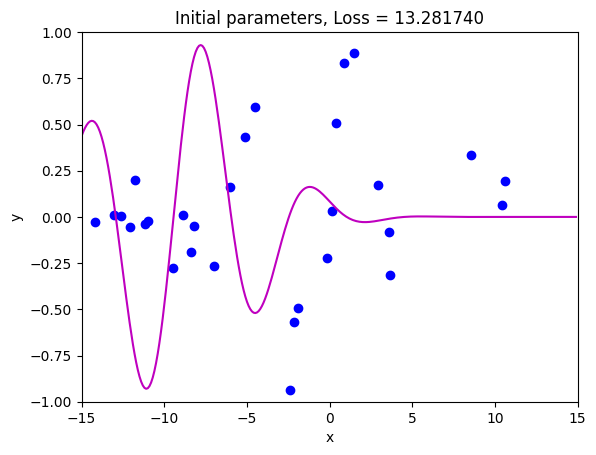

c_step 0
[[ 7.27478948]
 [15.57115455]]


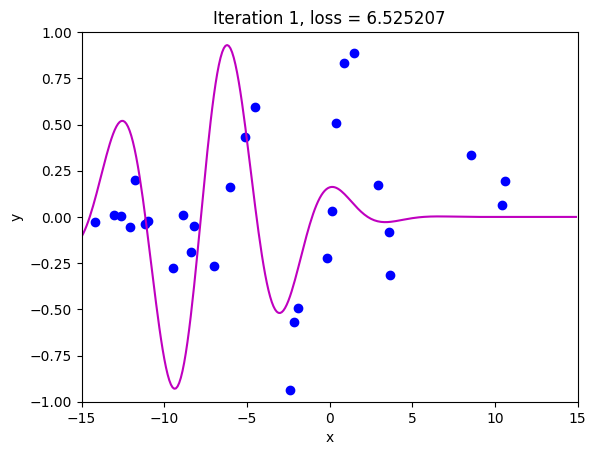

c_step 1
[[ 6.98035157]
 [15.53872899]]
c_step 2
[[ 6.78684854]
 [15.50666949]]
c_step 3
[[ 6.60276507]
 [15.51016062]]
c_step 4
[[ 6.39126131]
 [15.57019553]]


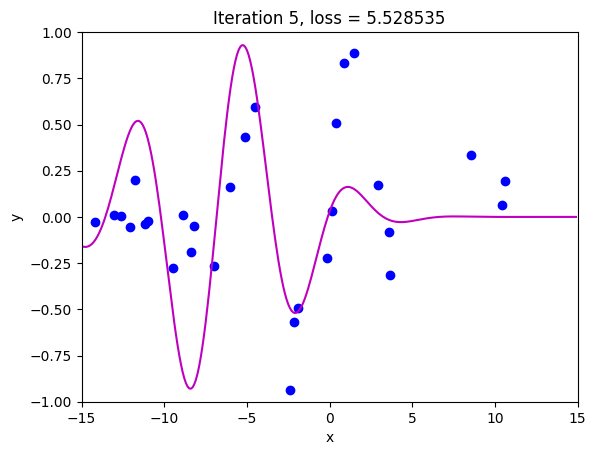

c_step 5
[[ 6.12982107]
 [15.70979768]]
c_step 6
[[ 5.88970138]
 [15.9153647 ]]
c_step 7
[[ 5.88349859]
 [16.0914554 ]]
c_step 8
[[ 5.93566263]
 [16.24297579]]


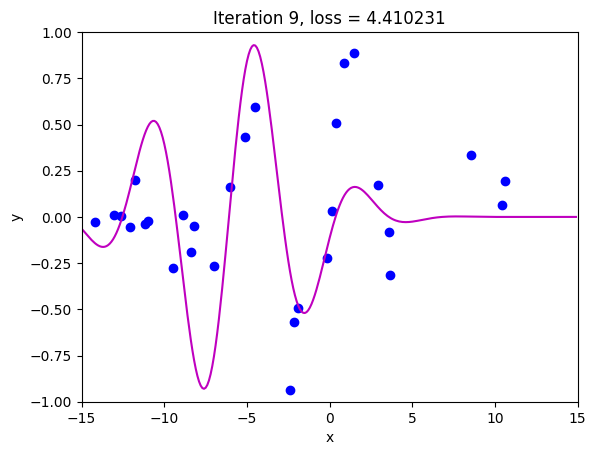

c_step 9
[[ 5.96114701]
 [16.38848307]]
c_step 10
[[ 5.99918828]
 [16.51920865]]
c_step 11
[[ 6.02832396]
 [16.64123681]]
c_step 12
[[ 6.05995788]
 [16.75242451]]


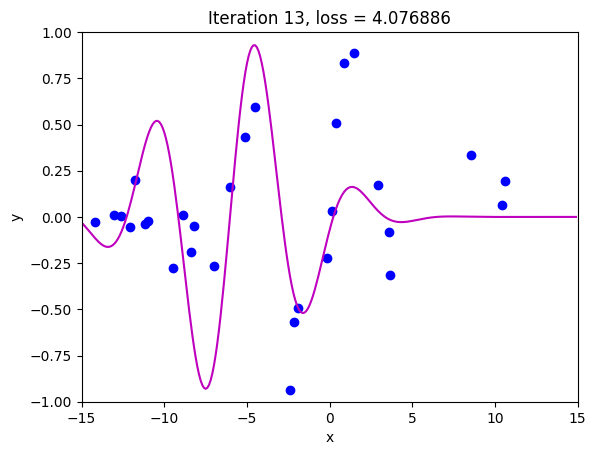

c_step 13
[[ 6.08756899]
 [16.85535827]]
c_step 14
[[ 6.11479657]
 [16.94984433]]
c_step 15
[[ 6.13967474]
 [17.03719673]]
c_step 16
[[ 6.16338671]
 [17.11777778]]


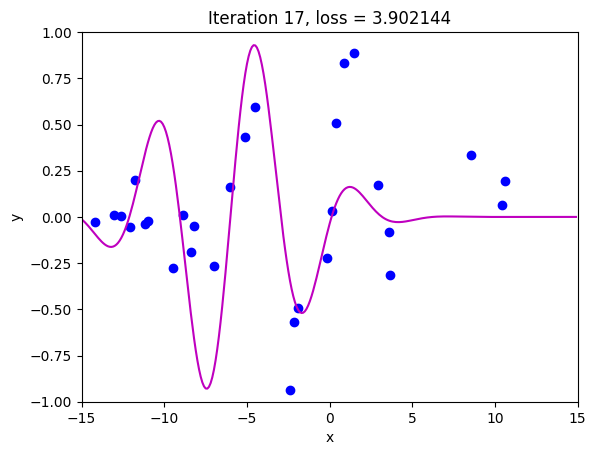

c_step 17
[[ 6.18542003]
 [17.19237729]]
c_step 18
[[ 6.20617909]
 [17.26145613]]
c_step 19
[[ 6.2255908 ]
 [17.32555984]]
c_step 20
[[ 6.24382292]
 [17.38510916]]


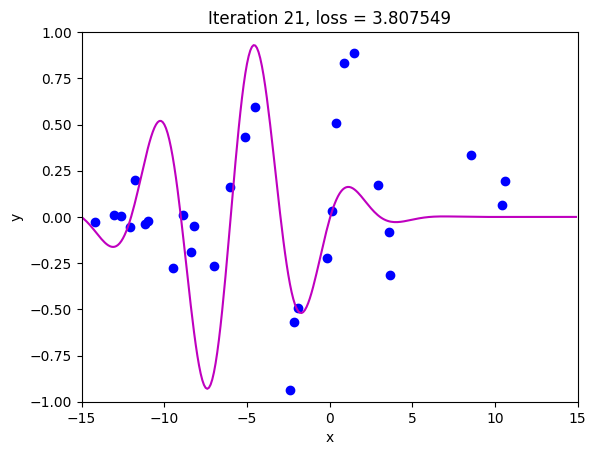

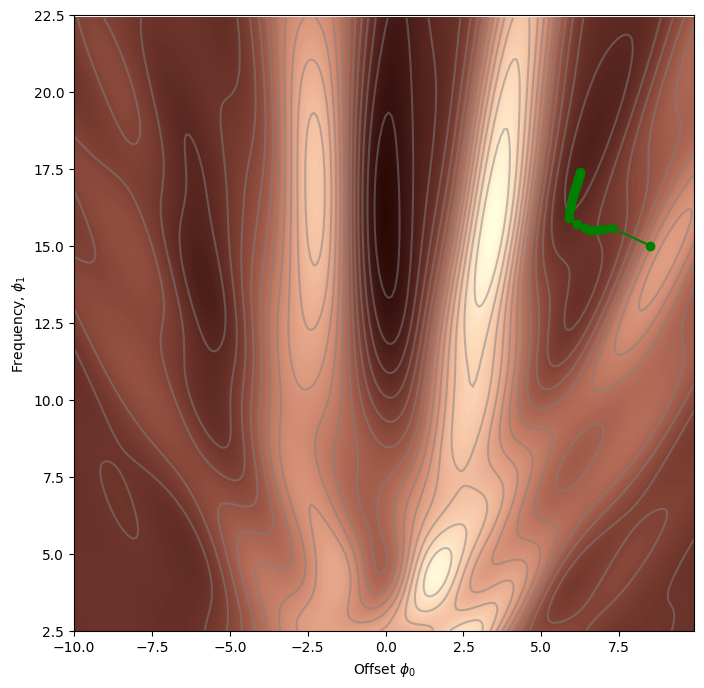

In [ ]:
# Let's keep track of the loss values
loss_all = np.zeros(n_steps+1)

# Measure loss and draw initial model
loss_all[0] =  compute_loss(
                  data[0,:],
                  data[1,:],
                  model,
                  phi_all[:,0:1]
                  )
print(phi_all[:,0:1])
draw_model(
  data,
  model,
  phi_all[:,0:1],
  "Initial parameters, Loss = %f"%(loss_all[0])
  )

# Here's our gradient descent training loop
for c_step in range (n_steps):
  print("c_step", c_step)

  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(
                                    phi_all[:,c_step:c_step+1],
                                    data,
                                    model,
                                    alpha
                                  )
  print(phi_all[:,c_step+1:c_step+2])

  # Measure loss and
  loss_all[c_step+1] =  compute_loss(
                          data[0,:],
                          data[1,:],
                          model,
                          phi_all[:,c_step+1:c_step+2]
                        )

  # draw model every 4th step
  if c_step % 4 == 0:
    draw_model(
        data,
        model,
        phi_all[:,c_step+1],
        "Iteration %d, loss = %f"%(c_step+1,loss_all[c_step+1])
      )

draw_loss_function(compute_loss, data, model, my_colormap, phi_all)


It can be very informative to plot the training loss as a function of the iteration number.

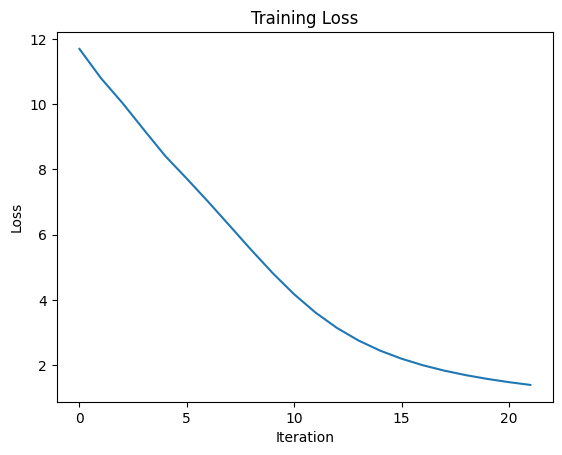

In [ ]:
# Plot training loss
plt.figure()
plt.plot(loss_all)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Note how smooth the training loss curve is.

<!-- BEGIN QUESTION -->

## Question 2.1 (5 points)

**TODO** Experiment with starting the optimization in the previous cells in different places and show that it heads to a local minimum if we don't start it in the right valley. To get credit for this question, the 2D loss plot should show our path ending in a local minimum.

I initialized phi[0] to be 8.5 and phi[1] to be 15 so that once the model trains it converges to a local minimum (it has a more lighter shade/coloring in the contour plot than the global minimum between a bounded set of parameter initialization scheme). You can see the 2D loss plot ends in a local minimum than the previous initialization that was given to us (phi[0] = -1.5 and phi[1]=8.5)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2.2 (5 points)

**TODO** Experiment with the learning rate, alpha.

(a) What happens if you set it too large?

(b) What happens if you set it too small?

When we set the learning rate, alpha, to be very large (2.0), the updated parameter jumps to all sort of different places and fails to converge to the lcal minimas on the contour plot.

When we set the learning rate, alpha, to be very small (0.00001), it failed to converge and failed to move out of the region where it was initialized. The loss stayed very similar.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2.3 (5 points)

Complete the cells below.

Create a permutation of the data indices.

In [ ]:
# Set the random number generator so you always get same numbers
np.random.seed(1)

# TODO -- Create a permutation of the data indices
# You can use the function np.random.permutation()
batched_indices = np.random.permutation(data.shape[1])
batched_indices

array([17, 21, 10, 19, 14, 20, 26,  3, 24, 22, 23,  4,  2, 25,  6, 18, 13,
        7, 27,  1, 16,  0, 15, 29, 28,  9,  8, 12, 11,  5])

Now complete the function to take a stochastic gradient descent step.

In [ ]:
def stochastic_gradient_descent_step(phi, data, alpha, batch_size, batched_indices, iter_num):
  """
  One step of gradient update of parameters.

  Args:
    phi: parameters to be updated
    data: entire dataset
    alpha: learning rate to use in the update
    batch_size: SGD batch size
    batched_indcies: permuted dataset indices
    iter_num: The batch iteration number in the epoch
  """
  # TODO -- fill in this routine so that we take a step of size alpha * gradient
  # using the appropriate batch of data.
  indices = np.array_split(batched_indices,len(batched_indices/batch_size))[iter_num]
  val = data[:, indices]
  data_x = val[0, :]
  data_y = val[1, :]

  gradient = compute_gradient(data_x=data_x, data_y=data_y, phi=phi)

  phi = phi -( (alpha *  (1 / batch_size) * gradient))
  return phi

In [ ]:
# TODO Define a batch size, e.g. 5
batch_size = 1

# TODO Calculate the total number of batches to complete an epoch
# The result should be rounded up and an integer
n_batches = data.shape[1] // batch_size
n_batches

30

In [ ]:
# Initialize the parameters
n_steps = 81
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -3 # -1.5 # 3.5
phi_all[1,0] = 8.5 #6.5

alpha = 0.5

In [ ]:
n_steps= 115
phi_all = np.zeros((2, n_steps+1))
phi_all[0, 0] = 0
phi_all[1, 0] = 10.5
alpha = 0.6

[[ 0. ]
 [10.5]]


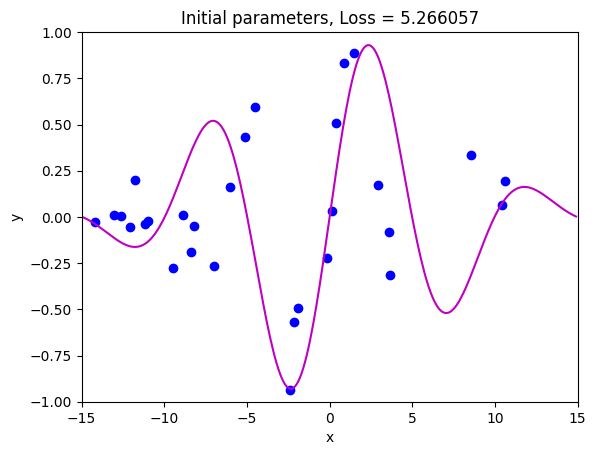

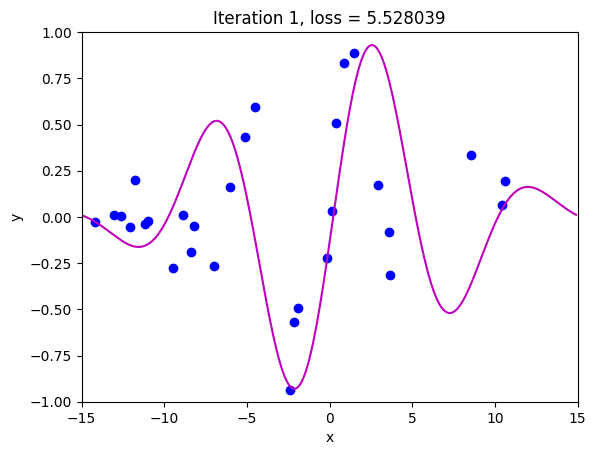

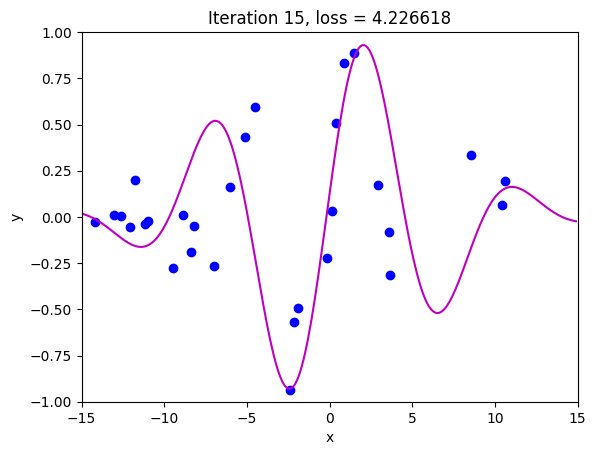

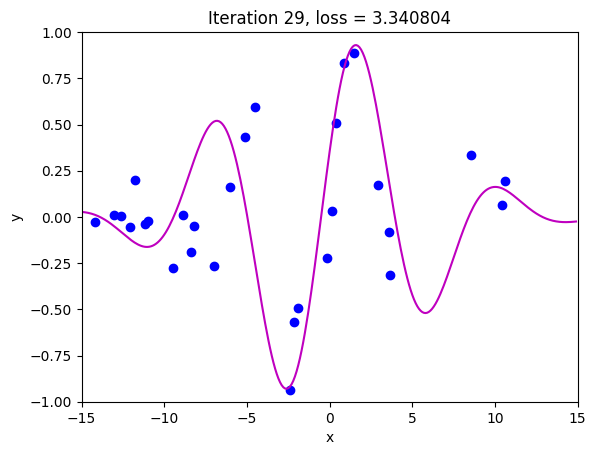

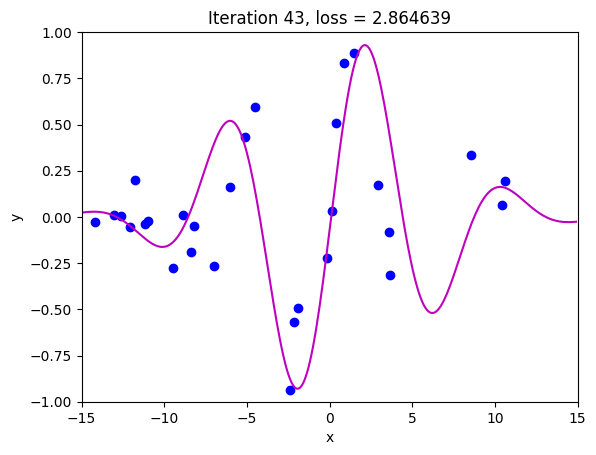

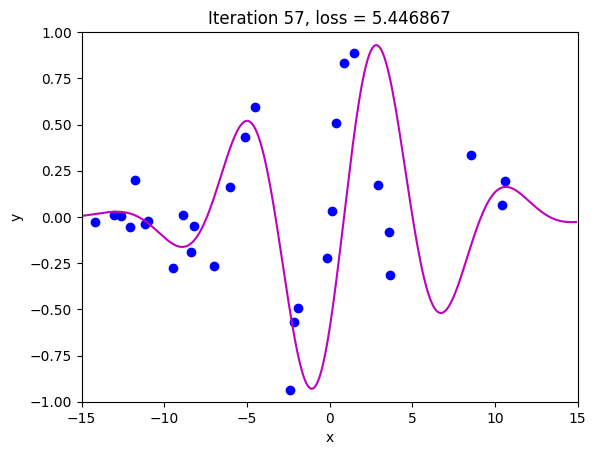

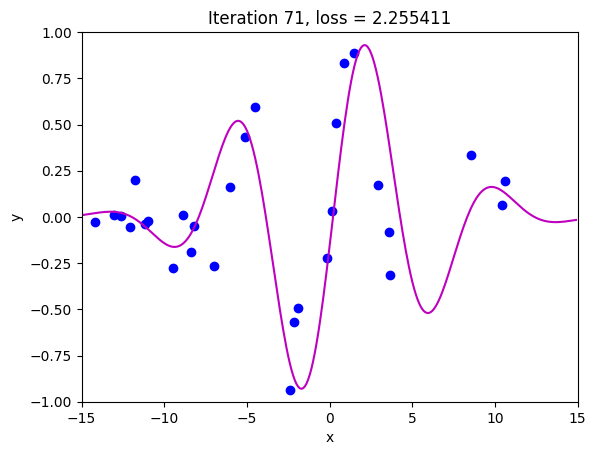

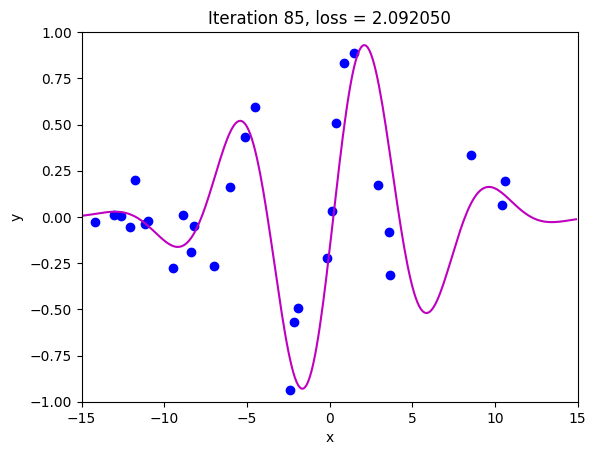

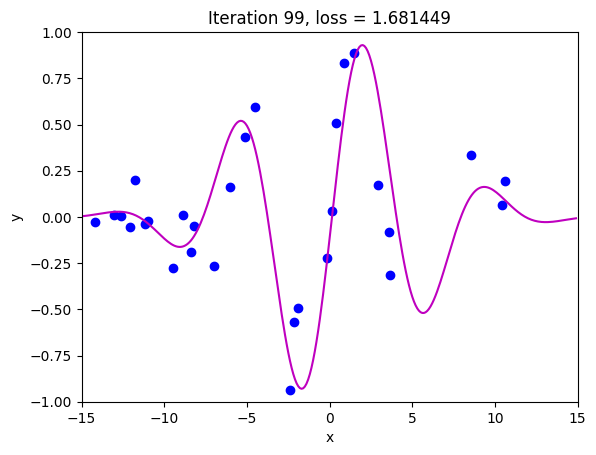

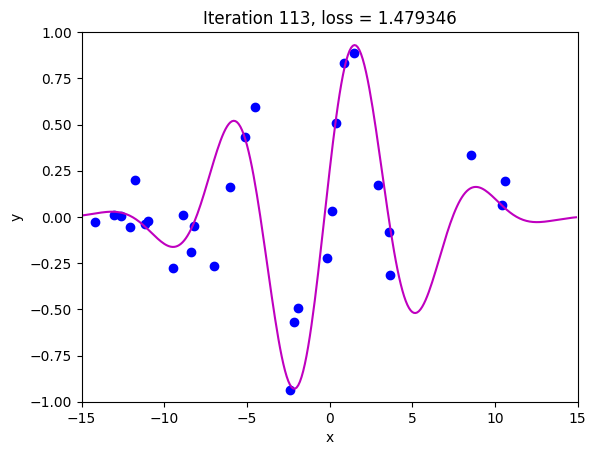

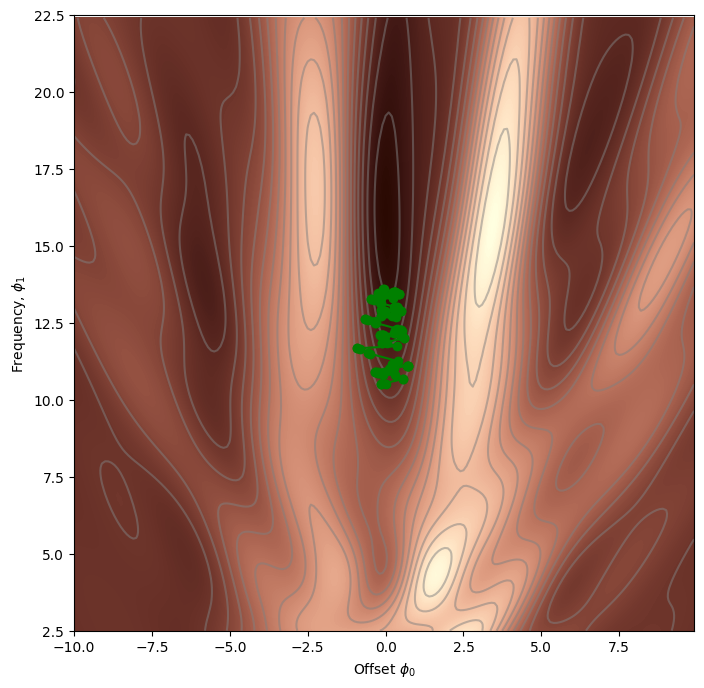

In [ ]:
# Let's keep track of the loss values
loss_all = np.zeros(n_steps+1)

# Measure loss and draw initial model
loss_all[0] =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
print(phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss_all[0]))

for c_step in range (n_steps):
  # print("c_step", c_step)

  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = stochastic_gradient_descent_step(
                                      phi_all[:,c_step:c_step+1],
                                      data,
                                      alpha=alpha,
                                      batch_size=batch_size,
                                      batched_indices=batched_indices,
                                      iter_num=c_step % n_batches
                                  )
  # print(phi_all[:,c_step+1:c_step+2])

  loss_all[c_step+1] =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])

  # Measure loss and draw model every 8th step
  if c_step % (n_steps//8) == 0:

    draw_model(
      data,
      model,
      phi_all[:,c_step+1],
      "Iteration %d, loss = %f"%(c_step+1,loss_all[c_step+1])
    )

draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

Let's plot the training loss as a function of the iteration number again. You should see that it's not as smooth as before.

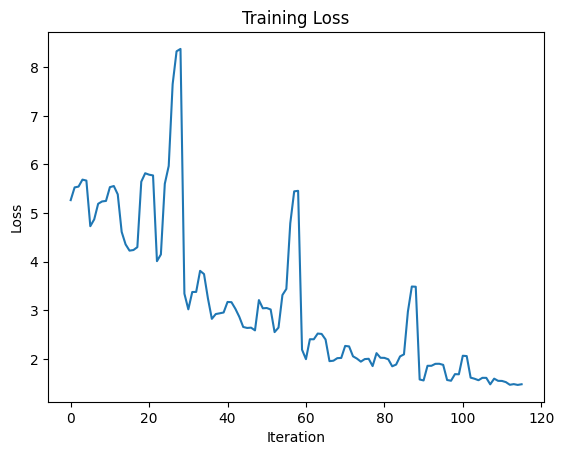

In [ ]:
# Plot training loss
plt.figure()
plt.plot(loss_all)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
grader.check("q2.3")

<!-- END QUESTION -->

Note how the loss curve is not as smooth as before because of the high variance in the gradient updates.

## Question 2.4 (5 points)

**TODO** -- Experiment with different learning rates, starting points, batch sizes, number of steps.

Try to get the loss to be less than 1.5.

In [ ]:
print("Final loss = %f"%loss_all[-1])

Final loss = 1.476333


In [ ]:
grader.check("q2.4")

---

## Part 3 -- Momentum

---


This part investigates the use of momentum as illustrated in figure 6.7 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

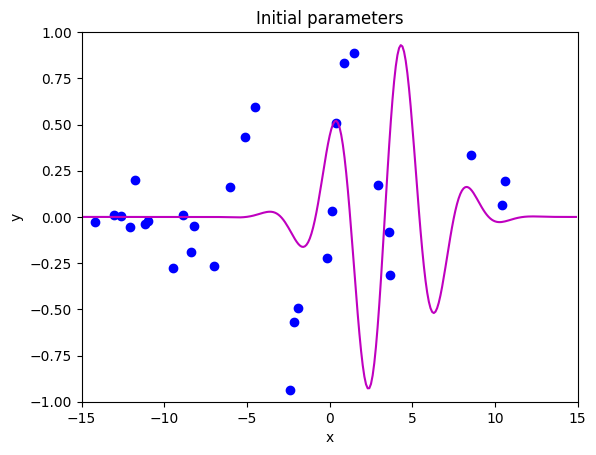

In [ ]:
# Initialize the parameters and draw the model
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency
draw_model(data,model,phi, "Initial parameters")

Let's first run standard stochastic gradient descent with a relatively larger learning rate.

In [ ]:
# Initialize the parameters
n_steps = 81
batch_size = 5
alpha = 0.6
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

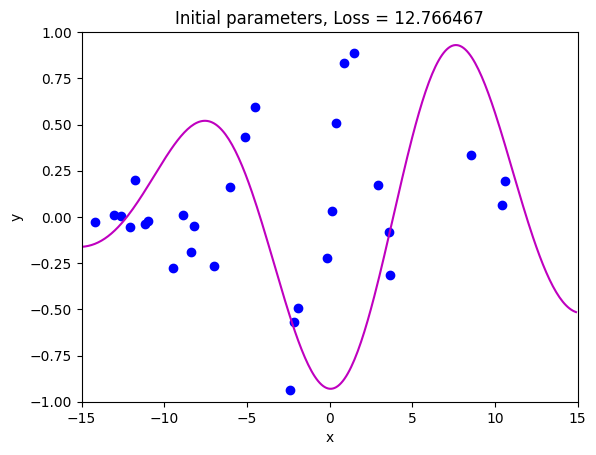

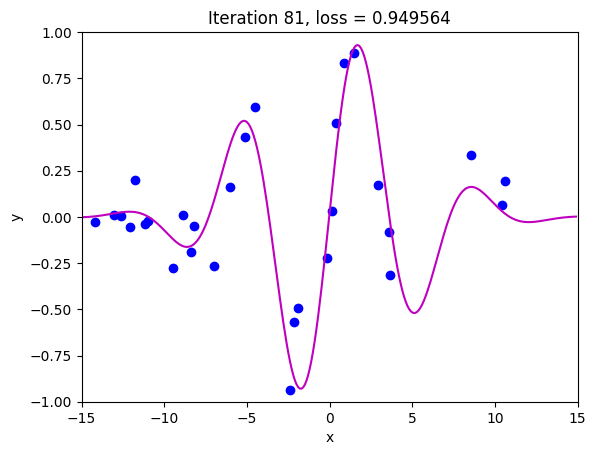

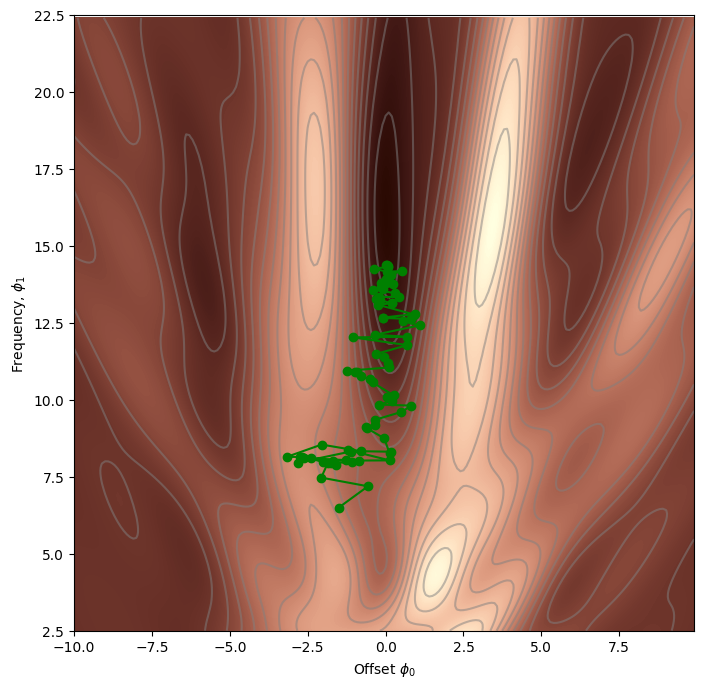

In [ ]:
# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Choose random batch indices
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]
  # Compute the gradient
  gradient = compute_gradient(
    data[0,batch_index],
    data[1,batch_index],
    phi_all[:,c_step:c_step+1]
    )
  # Update the parameters
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * gradient

loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

You can see the high variance in the gradient updates.

## Question 3.1 (5 points)
Now let's add momentum (equation 6.11)

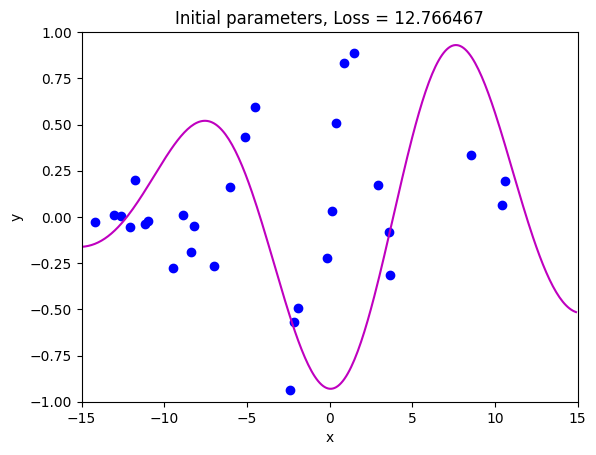

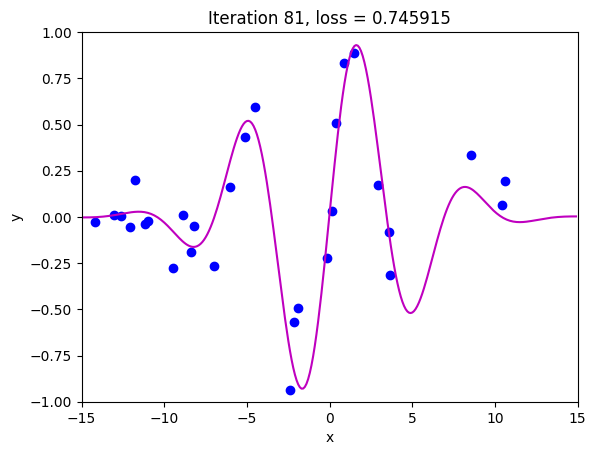

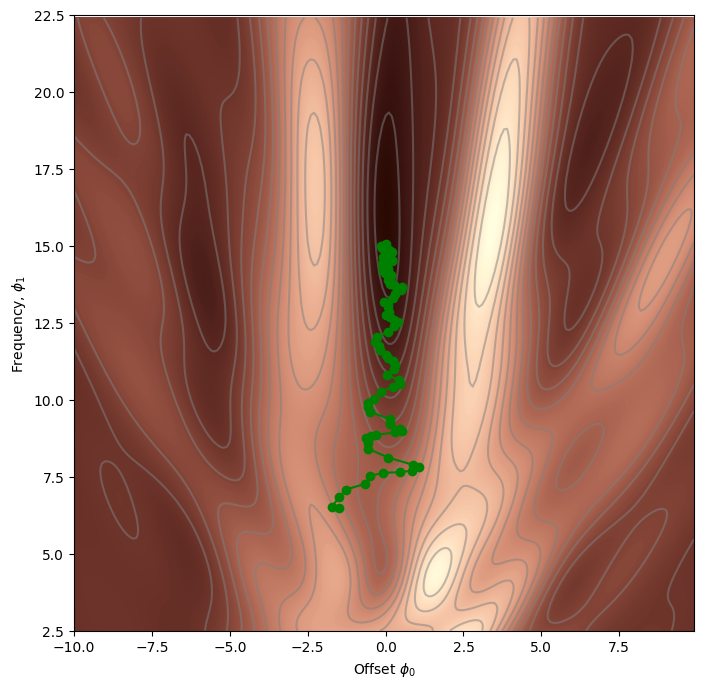

In [ ]:
# Set the random number generator so you always get same numbers (disable if you don't want this)
np.random.seed(1)
# Initialize the parameters
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Choose random batch indices
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]
  # Compute the gradient
  gradient = compute_gradient(data[0,batch_index], data[1,batch_index],  phi_all[:,c_step:c_step+1])
  # TODO -- calculate momentum - replace the line below
  momentum = (beta) * momentum + (1 - beta) * gradient
  # Update the parameters
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - (alpha * momentum)

loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

## Question 3.2 (5 points)

Finally, we'll try Nesterov momentum

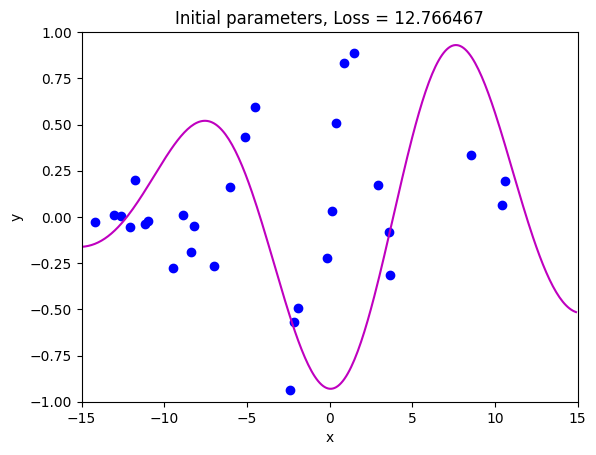

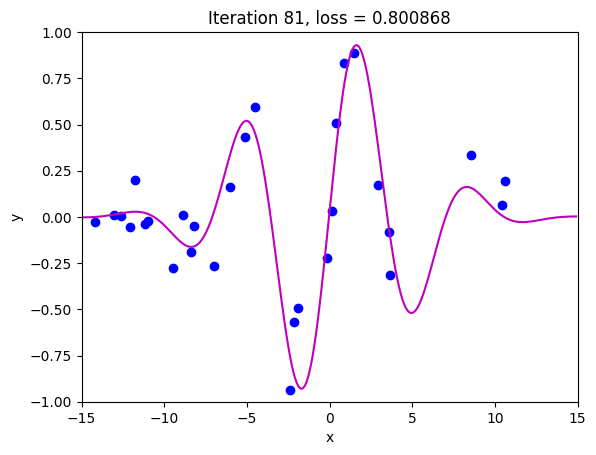

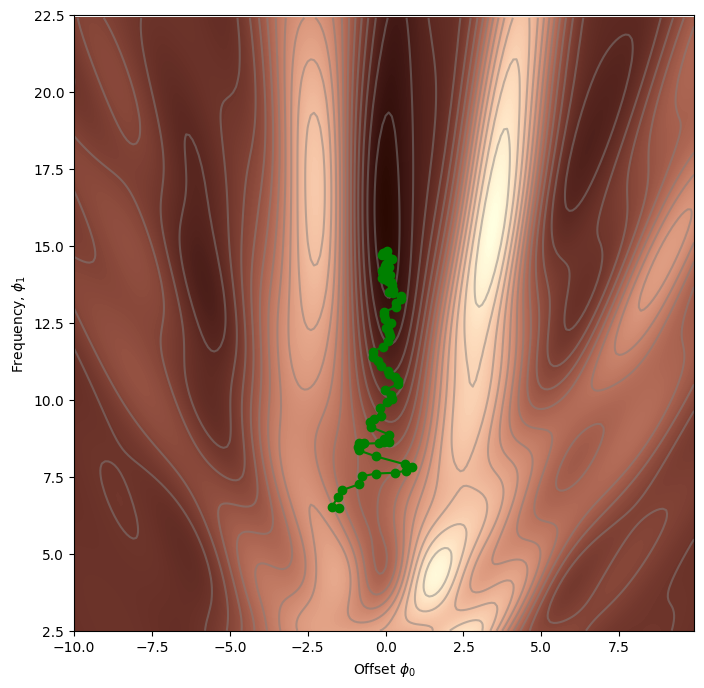

In [ ]:
# Set the random number generator so you always get same numbers (disable if you don't want this)
np.random.seed(1)
# Initialize the parameters
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Choose random batch indices
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]

  # TODO -- calculate Nesterov momentum - replace the lines below
  gradient = compute_gradient(
    data[0,batch_index],
    data[1,batch_index],
    phi_all[:,c_step:c_step+1] -( alpha * beta * momentum)
    )
  momentum = (beta) * momentum + (1 - beta) * gradient

  # Update the parameters
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * momentum

loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

Compare the final losses between momentum and Nesterov momentum.

The momentum had a lower loss than Nesterov momentum.

---

## Part 4 -- Adam

---


This part investigates the Adam algorithm as illustrated in figure 6.9 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

In [ ]:
# Define function that we wish to find the minimum of (normally would be defined implicitly by data and loss)
def loss(phi0, phi1):
    height = np.exp(-0.5 * (phi1 * phi1)*4.0)
    height = height * np. exp(-0.5* (phi0-0.7) *(phi0-0.7)/4.0)
    return 1.0-height

# Compute the gradients of this function (for simplicity, I just used finite differences)
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001;
    gradient = np.zeros((2,1));
    gradient[0] = (loss(phi0+delta_phi/2.0, phi1) - loss(phi0-delta_phi/2.0, phi1))/delta_phi
    gradient[1] = (loss(phi0, phi1+delta_phi/2.0) - loss(phi0, phi1-delta_phi/2.0))/delta_phi
    return gradient[:,0];

# Compute the loss function at a range of values of phi0 and phi1 for plotting
def get_loss_function_for_plot():
  grid_values = np.arange(-1.0,1.0,0.01);
  phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
  loss_function = np.zeros((grid_values.size, grid_values.size))
  for idphi0, phi0 in enumerate(grid_values):
      for idphi1, phi1 in enumerate(grid_values):
          loss_function[idphi0, idphi1] = loss(phi1,phi0)
  return loss_function, phi0mesh, phi1mesh

In [ ]:
# Plotting function
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, opt_path):
    fig = plt.figure();
    ax = plt.axes();
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap);
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.plot(opt_path[0,:], opt_path[1,:],'-', color='#a0d9d3ff')
    ax.plot(opt_path[0,:], opt_path[1,:],'.', color='#a0d9d3ff',markersize=10)
    ax.set_xlabel(r"$\phi_{0}$")
    ax.set_ylabel(r"$\phi_{1}$")
    plt.show()

In [ ]:
# Simple fixed step size gradient descent
def grad_descent(start_posn, n_steps, alpha):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step]);
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * this_grad
    return grad_path;

We'll start by running gradient descent twice, once with a small learning rate, and once with a larger learning rate.

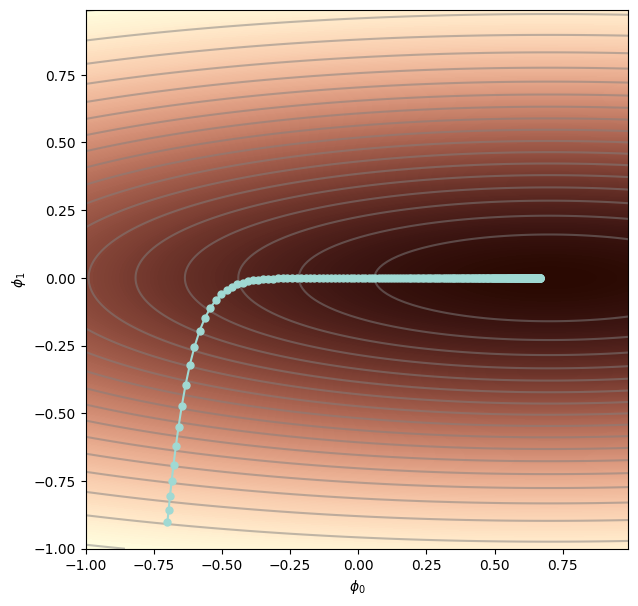

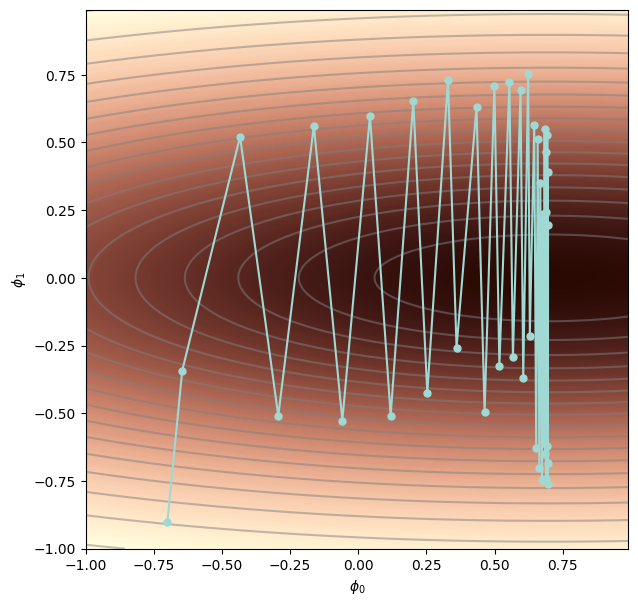

In [ ]:
loss_function, phi0mesh, phi1mesh = get_loss_function_for_plot() ;

start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent with a small learning rate
grad_path1 = grad_descent(start_posn, n_steps=200, alpha = 0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

# Run gradient descent with a larger learning rate
grad_path2 = grad_descent(start_posn, n_steps=40, alpha= 1.0)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path2)

Because the function changes much faster in $\phi_1$ than in $\phi_0$, there is no great step size to choose.  If we set the step size so that it makes sensible progress in the $\phi_1$ direction, then it takes many iterations to converge.  If we set the step size so that we make sensible progress in the $\phi_0$ direction, then the path oscillates in the $\phi_1$ direction.  

This motivates Adam.  At the core of Adam is the idea that we should just determine which way is downhill along each axis (i.e. left/right for $\phi_0$ or up/down for $\phi_1$) and move a fixed distance in that direction.

## Question 4.1 (5 points)

Complete the function below.

In [ ]:
def normalized_gradients(start_posn, n_steps, alpha,  epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):

        # Measure the gradient as in equation 6.13 (first line)
        m = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])

        # TODO -- compute the squared gradient as in equation 6.13 (second line)
        v = m ** 2

        # TODO -- apply the update rule (equation 6.14)
        grad_path[:,c_step+1] = grad_path[:, c_step] - alpha * (m / (np.sqrt(v) + epsilon))

    return grad_path;

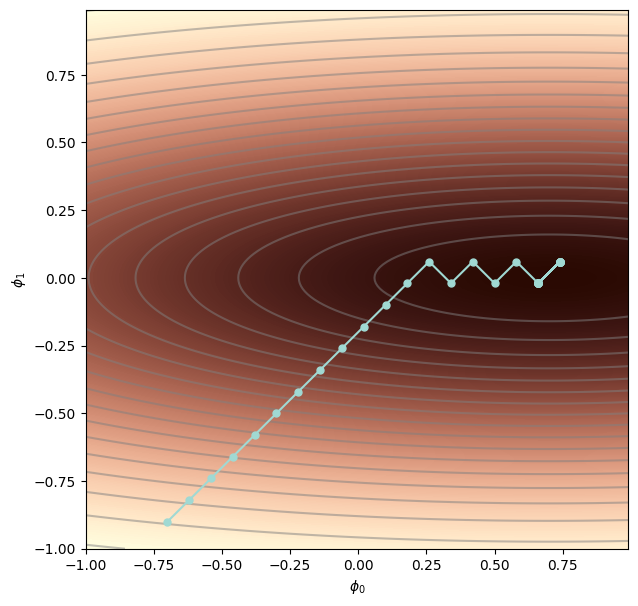

In [ ]:
# Let's try out normalized gradients
start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent
grad_path1 = normalized_gradients(start_posn, n_steps=40, alpha = 0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

This should look like figure 6.9(c) from the book.

This moves towards the minimum at a sensible speed, but we never actually converge -- the solution just bounces back and forth between the last two points.  To make it converge, we add momentum to both the estimates of the gradient and the pointwise squared gradient.  We also modify the statistics by a factor that depends on the time to make sure the progress is not slow to start with.

## Question 4.2 (5 points)

Complete the function below.

In [ ]:
def adam(start_posn, n_steps, alpha,  beta=0.9, gamma=0.99, epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    m = np.zeros_like(grad_path[:,0])
    v = np.zeros_like(grad_path[:,0])
    for c_step in range(n_steps):
        # Measure the gradient
        grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        # TODO -- Update the momentum based gradient estimate equation 6.15 (first line)
        m = (beta * m) + ((1 - beta) * grad)

        # TODO -- update the momentum based squared gradient estimate as in equation 6.15 (second line)

        v = (gamma * v) + ((1 - gamma) * (grad ** 2))

        # TODO -- Modify the statistics according to equation 6.16
        # You will need the function np.power
        m_tilda = m / (1 - np.power(beta, c_step+1))
        v_tilda = v / (1 - np.power(gamma, c_step+1))

        # TODO -- apply the update rule (equation 6.17)
        grad_path[:,c_step+1] = grad_path[:, c_step] - alpha * (m_tilda / np.sqrt(v_tilda) + epsilon)

    return grad_path;

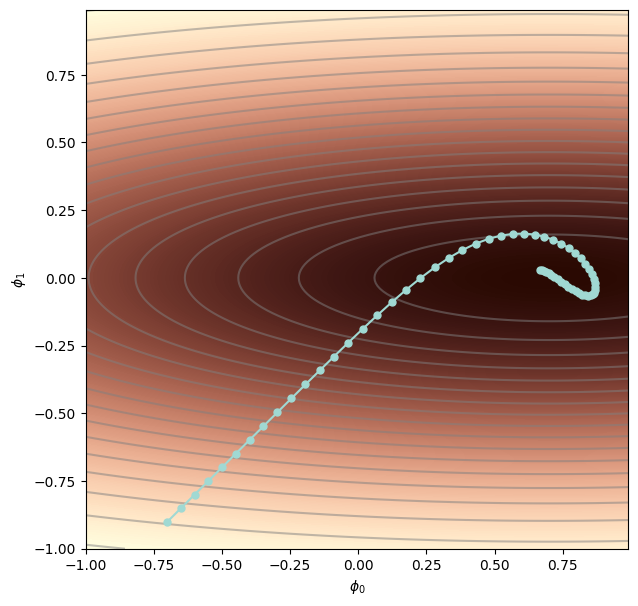

In [ ]:
# Let's try out our Adam algorithm
start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent
grad_path1 = adam(start_posn, n_steps=60, alpha = 0.05)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

It should look like figure 6.9(d) from the book.

---

**End of Notebook**

---
